In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment = "center",
                     color = "white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [ ]:
list_chanel = ['T_fx','T_fy','T_fz','I_fx','I_fy','I_fz','M_fx','M_fy','M_fz','R_fx','R_fy','R_fz','L_fx','L_fy','L_fz','ACC_x','ACC_y','ACC_z']
list_chanel_resultant = ['T_resultant','I_resultant','M_resultant','R_resultant','L_resultant']
list_chanel_contribute = ['T_contribute','I_contribute','M_contribute','R_contribute','L_contribute']
list_chanel_z = ['T_fz','I_fz','M_fz','R_fz','L_fz']
list_feature = ['mean','std','meadian','range']
list_segment_drink = ['pre_drink','rotate_drink', 'hori_drink','rotb_drink']
list_segment_grasp = ['pre_grasp','lift_grasp','hold_grasp','lower_grasp']
list_segment = list_segment_drink + list_segment_grasp

## DRINK

In [ ]:
## INTRA DRINK
def load_data_intra_drink(fol):
    fn = '/content/drive/My Drive/project/Build model/Data/Drink/'+fol+'.csv'
    f = pd.read_csv(fn)
    return f;
list_drink = []
list_drink = np.append(list_drink,'drink_length')
for k in list_segment_drink:
    list_drink = np.append(list_drink,k+'_length')
    for l in list_chanel_z:
        for m in list_feature:
            list_temp = (k+'_'+l+'_'+m)
            list_drink = np.append(list_drink,list_temp)
print(list_drink.shape)

(85,)


## RANDOM FOREST

Healthy Control group:  (117, 85)
Trigger Digit group:  (117, 85)
Train Data Shape: X  (234, 85)
Label Data Shape: Y  (234,)
---------------------------------
10 fold cross validation 
---------------------------------
Now ==> Start Fold  1
The accuracy in this fold: 70.833333
---------------------------------
Now ==> Start Fold  2
The accuracy in this fold: 91.666667
---------------------------------
Now ==> Start Fold  3
The accuracy in this fold: 75.000000
---------------------------------
Now ==> Start Fold  4
The accuracy in this fold: 66.666667
---------------------------------
Now ==> Start Fold  5
The accuracy in this fold: 82.608696
---------------------------------
Now ==> Start Fold  6
The accuracy in this fold: 78.260870
---------------------------------
Now ==> Start Fold  7
The accuracy in this fold: 69.565217
---------------------------------
Now ==> Start Fold  8
The accuracy in this fold: 78.260870
---------------------------------
Now ==> Start Fold  9
The accuracy in

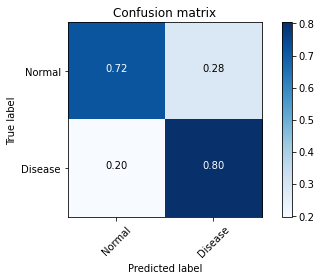

 Total Accuracy (average +- std):  76.06884057971016 +- 7.085371662686699


In [ ]:
## INTRA subject
HC = load_data_intra_drink('HC') # <================ Change here
T = load_data_intra_drink('T') # <================ Change here
print('Healthy Control group: ',HC.shape)
print('Trigger Digit group: ',T.shape)
X = pd.concat([HC,T],axis=0)
X = X.values 
print('Train Data Shape: X ',X.shape)
HC_label = np.zeros((len(HC)))
T_label = np.ones((len(T)))
Y = np.concatenate((HC_label,T_label))
print('Label Data Shape: Y ',Y.shape)

## RANDOM FOREST
cvscores = []
print('---------------------------------')
print('10 fold cross validation ')
k_fold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 17)
conf_mat_all = np.expand_dims(np.zeros(shape = (2, 2)), axis = 2)
i=1
print('---------------------------------')
for train, validate in k_fold.split(X,Y) :
    print('Now ==> Start Fold ',i)
    x_train, y_train = X[train], Y[train]
    x_validate, y_validate = X[validate], Y[validate]
    rf = RandomForestClassifier(n_estimators = 100, max_depth = 20, 
                                min_samples_leaf = 5, n_jobs = -1)
    rf.fit(x_train,y_train)
    pred = rf.predict(x_validate)
    scores=accuracy_score(y_validate,pred)*100
    print("The accuracy in this fold: %f"%scores)
    print("---------------------------------")
    cvscores.append(scores)
    conf_mat = np.expand_dims(confusion_matrix(y_validate, pred), axis = 2)
    conf_mat_all = np.concatenate([conf_mat_all, conf_mat], axis = 2)
    i +=1
conf_mat_sum = np.sum(conf_mat_all, axis = 2)
plot_confusion_matrix(conf_mat_sum, classes = ['Normal','Disease'], 
                      cmap = plt.cm.Blues,normalize = True)
plt.show()
print(" Total Accuracy (average +- std): ", np.mean(cvscores),'+-',np.std(cvscores))
print("=======================================")

In [ ]:
HC

,drink_length,pre_drink_length,pre_drink_T_fz_mean,pre_drink_T_fz_std,pre_drink_T_fz_meadian,pre_drink_T_fz_range,pre_drink_I_fz_mean,pre_drink_I_fz_std,pre_drink_I_fz_meadian,pre_drink_I_fz_range,...,rotb_drink_M_fz_meadian,rotb_drink_M_fz_range,rotb_drink_R_fz_mean,rotb_drink_R_fz_std,rotb_drink_R_fz_meadian,rotb_drink_R_fz_range,rotb_drink_L_fz_mean,rotb_drink_L_fz_std,rotb_drink_L_fz_meadian,rotb_drink_L_fz_range
0,8.000,0.69125,4.709849,4.833571,3.169938,14.759016,3.040571,2.076008,2.251476,6.343744,...,2.327853,2.646623,1.078015,0.261433,1.200444,1.324229,1.783455,0.450689,1.816233,2.296980
1,15.000,3.53500,7.308376,3.248188,6.208348,16.100217,2.150196,1.059381,2.044679,5.131178,...,4.258963,4.806451,2.366980,0.587291,2.531484,2.927376,1.524483,0.538298,1.626210,2.133656
2,10.000,0.85500,5.135423,1.665739,5.296802,6.342461,1.990401,0.712078,2.254257,2.808893,...,3.354445,4.012459,2.878623,0.989403,3.111923,3.832065,1.292246,0.557211,1.259290,1.715468
3,15.000,4.75625,11.225971,5.620827,9.745518,18.417674,4.215106,1.789777,3.957131,6.949715,...,2.619818,3.244141,1.777512,0.481856,1.635349,2.244606,1.094236,0.522047,0.789816,1.749598
4,8.000,0.73375,3.645849,4.172604,1.843869,12.319415,0.602400,0.687834,0.324138,2.083259,...,1.553127,1.639186,1.744090,0.409650,1.867330,1.923228,0.624569,0.288940,0.569795,1.163342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,8.000,1.50375,5.086082,1.707863,5.210950,7.928596,2.137357,0.716329,2.349499,2.962765,...,1.094047,1.263581,0.785303,0.097008,0.809781,0.519791,0.787027,0.124468,0.777070,0.757409
113,14.926,3.81500,2.657847,1.704755,2.144745,7.683587,1.361914,0.781659,1.054727,3.295304,...,2.929722,3.132909,1.269414,0.283943,1.372483,1.235115,1.504827,0.449904,1.676372,1.749952
114,13.476,3.25400,5.004507,5.489817,3.304183,16.832391,1.361394,1.628231,0.657468,4.243341,...,1.405927,1.092786,1.430368,0.290640,1.531960,1.188095,1.288857,0.462858,1.368056,1.782142
115,9.000,2.24125,9.205609,4.587408,11.951970,14.392614,2.957210,1.562387,3.605535,4.405469,...,1.479171,2.672147,2.444458,0.535541,2.553860,2.608858,1.298660,0.407222,1.432055,1.735114


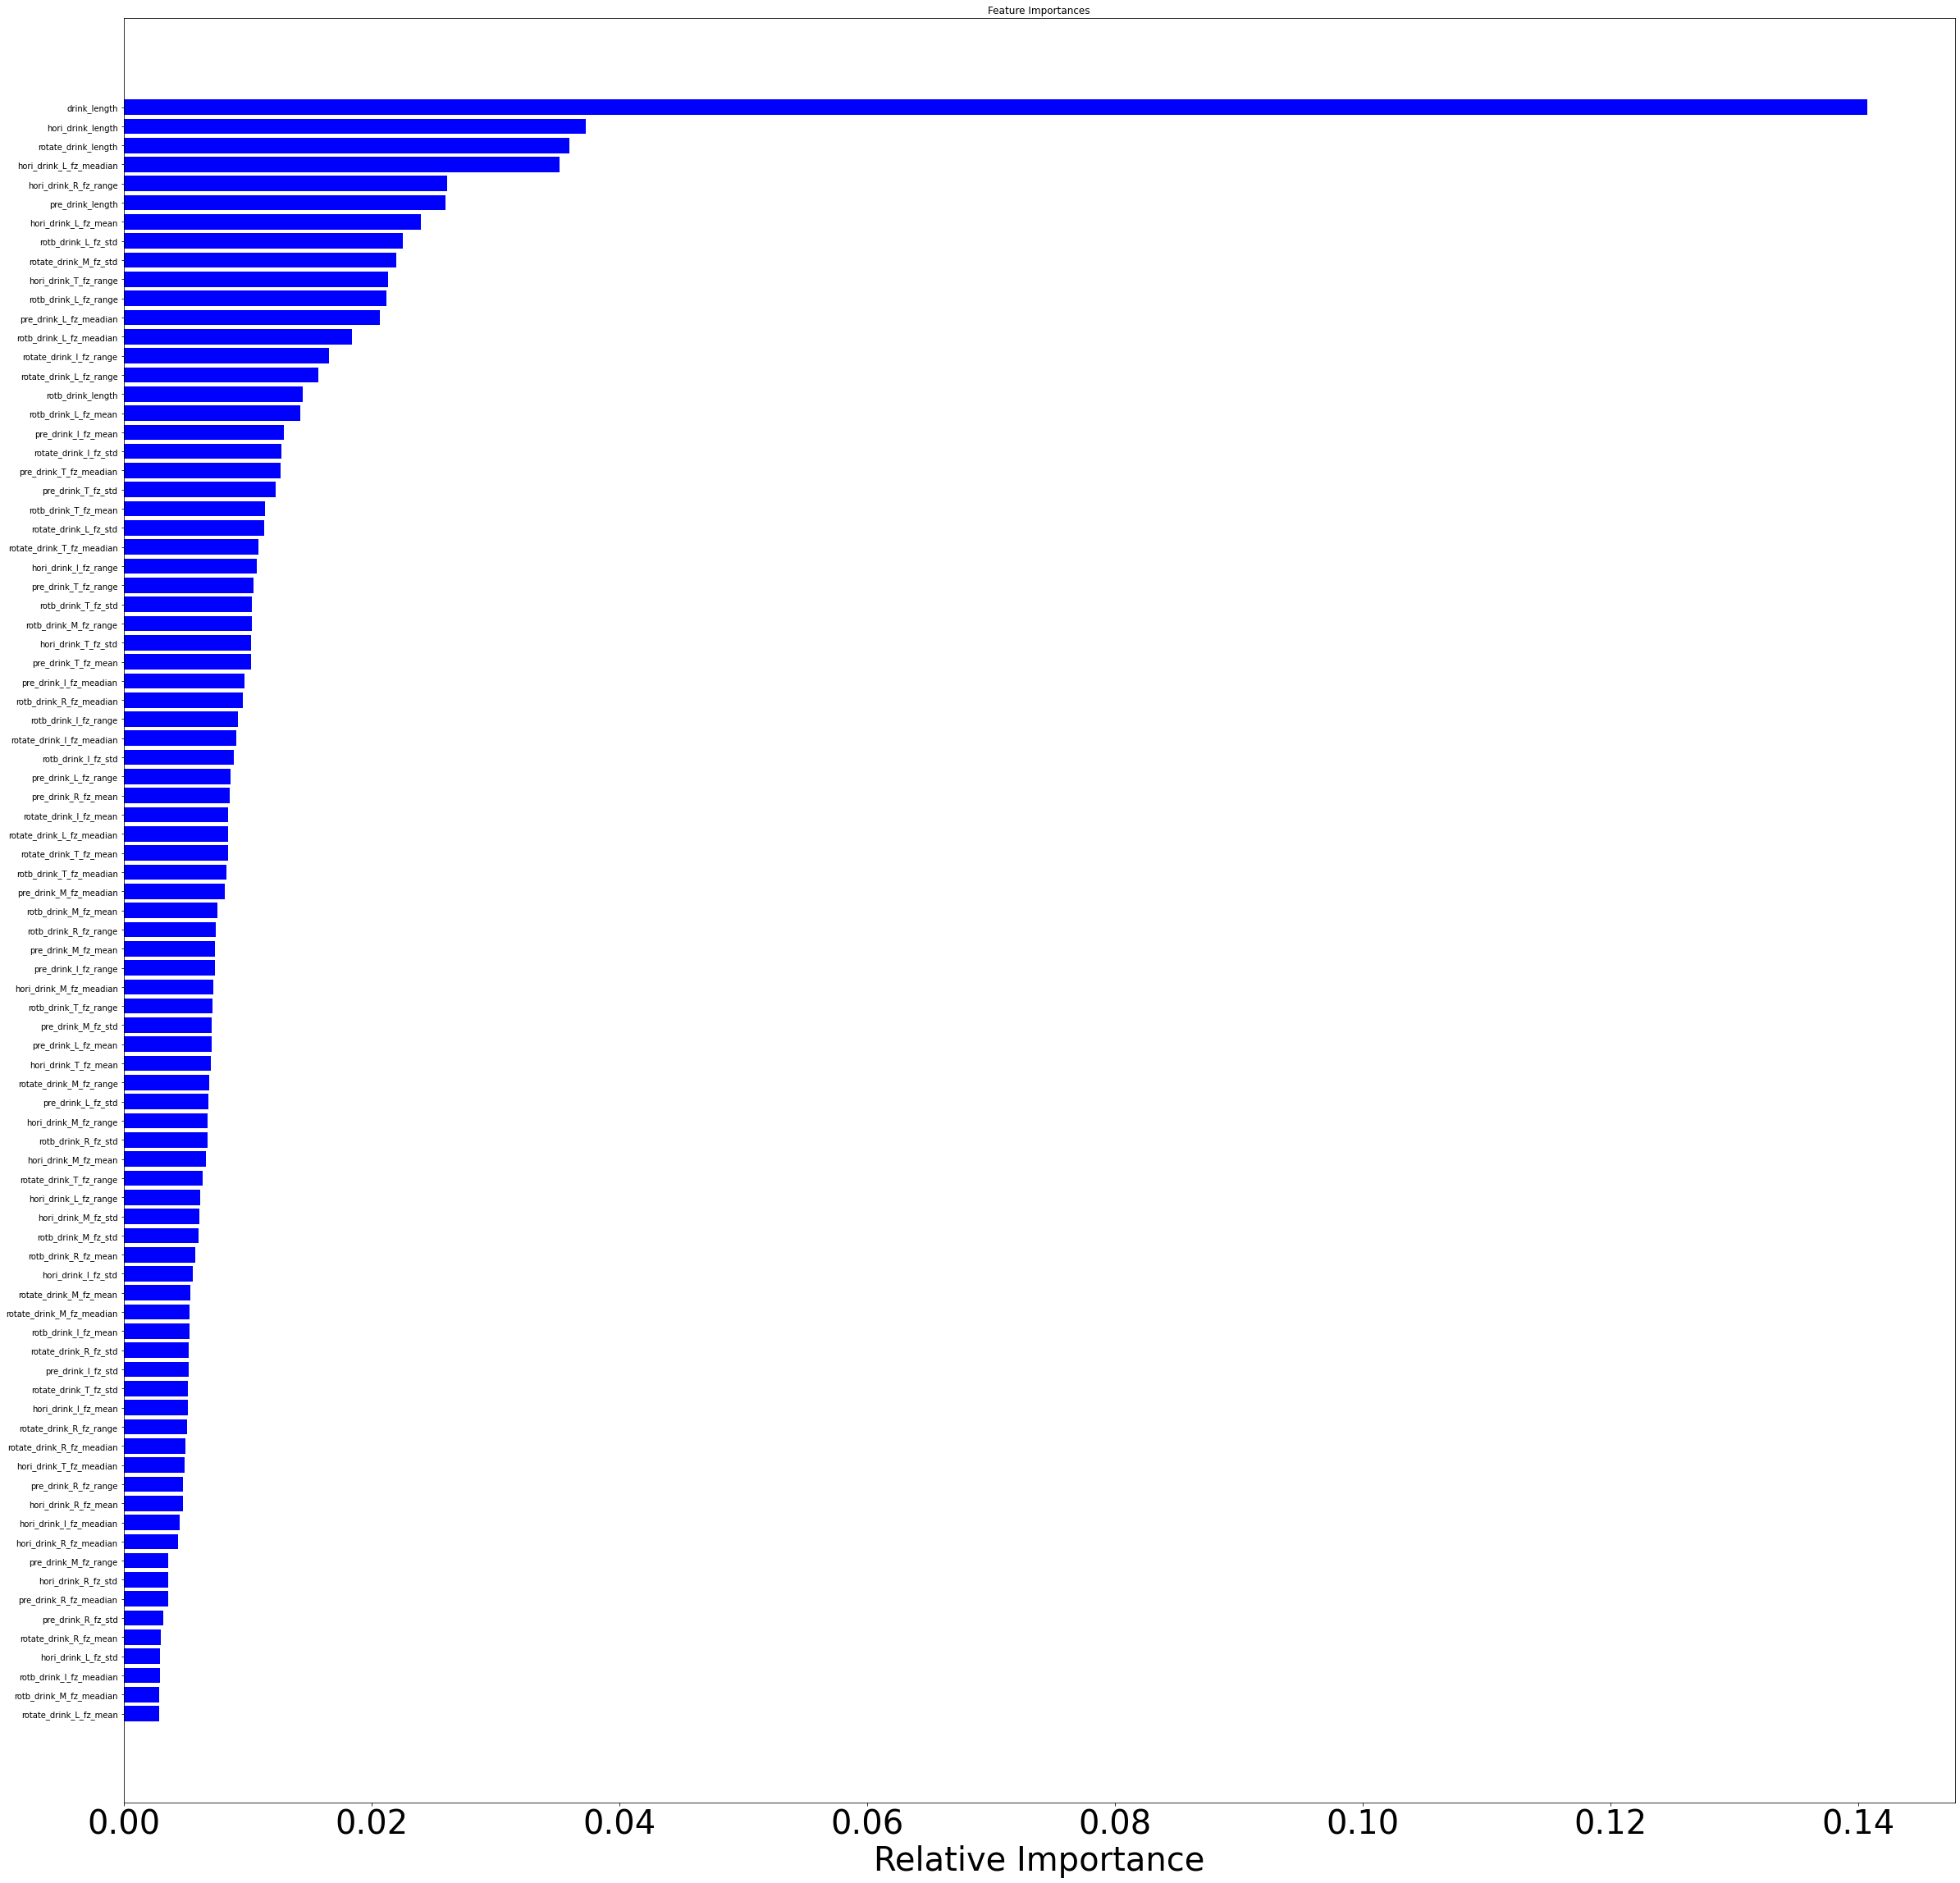

In [ ]:
## Important all 
importances = rf.feature_importances_
# indices = np.argsort(importances)
indices = importances.argsort()
plt.figure(figsize = (40, 40))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [list_drink[i] for i in indices]),#fontsize=40)
plt.xticks(fontsize=40)
plt.xlabel('Relative Importance',fontsize=40)
# plt.savefig
plt.show()

feats = pd.Series(data = rf.feature_importances_ , index = list_drink)
feats = feats.sort_values(ascending = False)

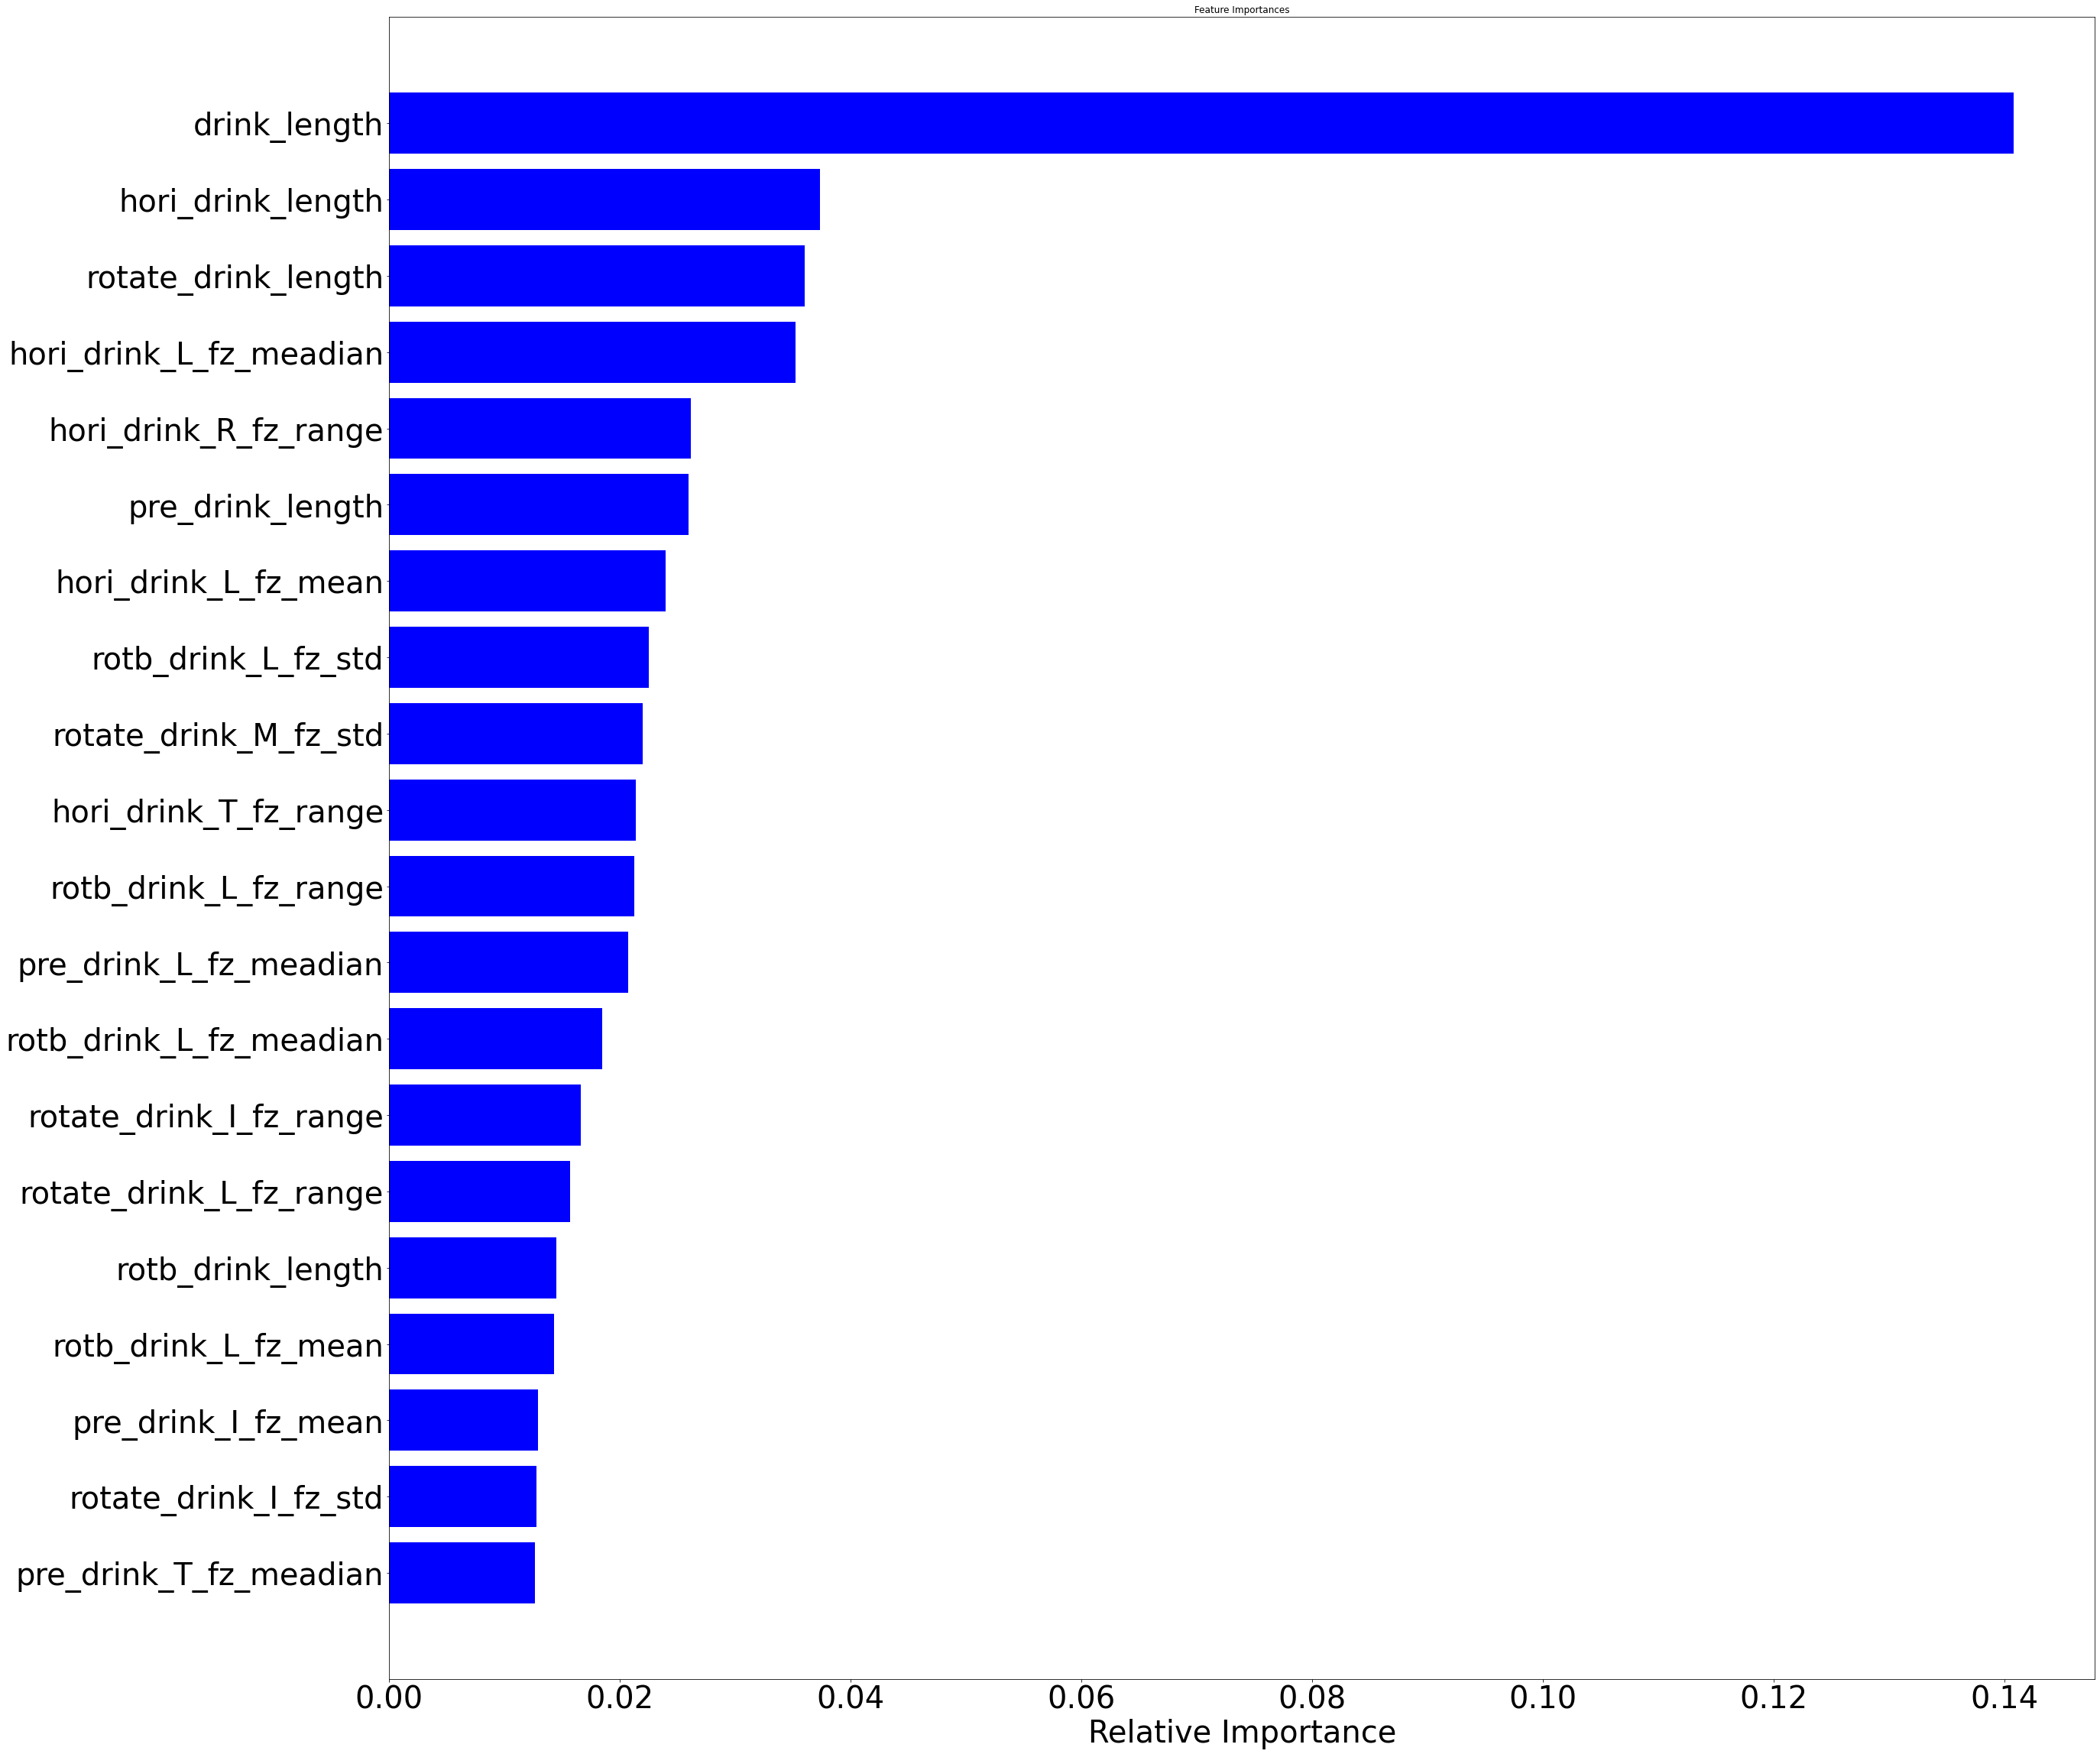

In [ ]:
## Important first 20
importances = rf.feature_importances_
# indices = np.argsort(importances)
indices = importances.argsort()[-20:][::1]
plt.figure(figsize = (40, 40))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color = 'b', align = 'center')
plt.yticks(range(len(indices)), [list_drink[i] for i in indices], fontsize=40)
plt.xticks(fontsize=40)
plt.xlabel('Relative Importance',fontsize=40)
# plt.savefig
plt.show()

feats = pd.Series(data = rf.feature_importances_ , index = list_drink)
feats = feats.sort_values(ascending = False)
feats = pd.DataFrame(feats)
feats = feats.T
feats.to_csv(r'/home/motionlab/Desktop/Billy/Build model/Importance.csv', index = False)

In [ ]:
feats

,drink_length,hori_drink_length,rotate_drink_length,hori_drink_L_fz_meadian,hori_drink_R_fz_range,pre_drink_length,hori_drink_L_fz_mean,rotb_drink_L_fz_std,rotate_drink_M_fz_std,hori_drink_T_fz_range,...,hori_drink_R_fz_meadian,pre_drink_M_fz_range,hori_drink_R_fz_std,pre_drink_R_fz_meadian,pre_drink_R_fz_std,rotate_drink_R_fz_mean,hori_drink_L_fz_std,rotb_drink_I_fz_meadian,rotb_drink_M_fz_meadian,rotate_drink_L_fz_mean
0,0.140771,0.037314,0.035986,0.035215,0.026137,0.02596,0.023979,0.022525,0.021986,0.021361,...,0.004371,0.00362,0.00362,0.003615,0.003175,0.003002,0.002939,0.002913,0.0029,0.002888


## TEST SET

Test set accuracy  78.0


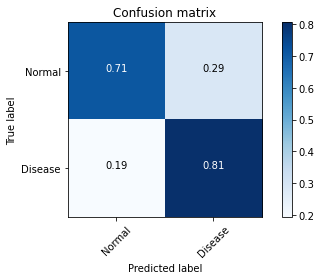

In [ ]:
HC_test = load_data_intra_drink('HC_test')  # <================ Change here
HC_test = HC_test.values
T_test = load_data_intra_drink('T_test')   # <================ Change here
T_test = T_test.values
x_test = np.concatenate((HC_test,T_test))
HC_test_label = np.zeros(len(HC_test))
T_test_label = np.ones(len(T_test))
y_test = np.concatenate((HC_test_label,T_test_label))
pred = rf.predict(x_test)
scores = accuracy_score(y_test,pred)*100
print('Test set accuracy ',scores)
conf_mat = np.expand_dims(confusion_matrix(y_test, pred), axis = 2)
conf_mat=np.sum(conf_mat,axis=2)
plot_confusion_matrix(conf_mat, classes = ['Normal','Disease'], 
                      cmap = plt.cm.Blues,normalize = True)

## GRASP

In [ ]:
## INTRA GRASP
def load_data_intra_grasp(fol):
    fn ='/content/drive/My Drive/project/Build model/Data/Grasp/' + fol + '.csv'
    f = pd.read_csv(fn)
    return f;
list_grasp = []
list_grasp = np.append(list_grasp,'grasp_length')
for k in list_segment_grasp:
    list_grasp = np.append(list_grasp,k+'_length')
    for l in list_chanel_z:
        for m in list_feature:
            list_temp = (k+'_'+l+'_'+m)
            list_grasp = np.append(list_grasp,list_temp)

## RANDOM FOREST

Healthy Control group:  (117, 85)
Trigger Digit group:  (117, 85)
Train Data Shape: X  (234, 85)
Label Data Shape: Y  (234,)
---------------------------------
10 fold cross validation 
---------------------------------
Now ==> Start Fold  1
The accuracy in this fold: 66.666667
---------------------------------
Now ==> Start Fold  2
The accuracy in this fold: 66.666667
---------------------------------
Now ==> Start Fold  3
The accuracy in this fold: 79.166667
---------------------------------
Now ==> Start Fold  4
The accuracy in this fold: 79.166667
---------------------------------
Now ==> Start Fold  5
The accuracy in this fold: 78.260870
---------------------------------
Now ==> Start Fold  6
The accuracy in this fold: 69.565217
---------------------------------
Now ==> Start Fold  7
The accuracy in this fold: 73.913043
---------------------------------
Now ==> Start Fold  8
The accuracy in this fold: 86.956522
---------------------------------
Now ==> Start Fold  9
The accuracy in

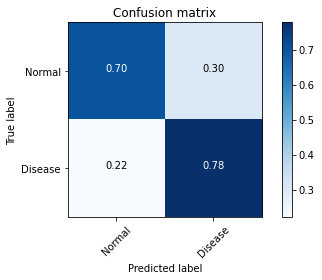

 Total Accuracy (average +- std):  73.94927536231884 +- 8.638398472306752


In [ ]:
## INTRA subject
HC = load_data_intra_grasp('HC') # <================ Change here
T = load_data_intra_grasp('T') # <================ Change here
print('Healthy Control group: ',HC.shape)
print('Trigger Digit group: ',T.shape)
X = pd.concat([HC,T],axis=0)
X = X.values 
print('Train Data Shape: X ',X.shape)
HC_label = np.zeros((len(HC)))
T_label = np.ones((len(T)))
Y = np.concatenate((HC_label,T_label))
print('Label Data Shape: Y ',Y.shape)

## RANDOM FOREST
cvscores = []
print('---------------------------------')
print('10 fold cross validation ')
k_fold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 17)
conf_mat_all = np.expand_dims(np.zeros(shape = (2, 2)), axis = 2)
i=1
print('---------------------------------')
for train, validate in k_fold.split(X,Y) :
    print('Now ==> Start Fold ',i)
    x_train, y_train = X[train], Y[train]
    x_validate, y_validate = X[validate], Y[validate]
    rf = RandomForestClassifier(n_estimators = 100, max_depth = 20, 
                                min_samples_leaf = 5, n_jobs = -1)
    rf.fit(x_train,y_train)
    pred = rf.predict(x_validate) 
    scores = accuracy_score(y_validate,pred)*100
    print("The accuracy in this fold: %f"%scores)
    print("---------------------------------")
    cvscores.append(scores)
    conf_mat = np.expand_dims(confusion_matrix(y_validate, pred), axis = 2)
    conf_mat_all = np.concatenate([conf_mat_all, conf_mat], axis = 2)
    i +=1
conf_mat_sum = np.sum(conf_mat_all, axis = 2)
plot_confusion_matrix(conf_mat_sum, classes = ['Normal','Disease'], 
                      cmap = plt.cm.Blues,normalize = True)
plt.show()
print(" Total Accuracy (average +- std): ", np.mean(cvscores),'+-',np.std(cvscores))
print("=======================================")

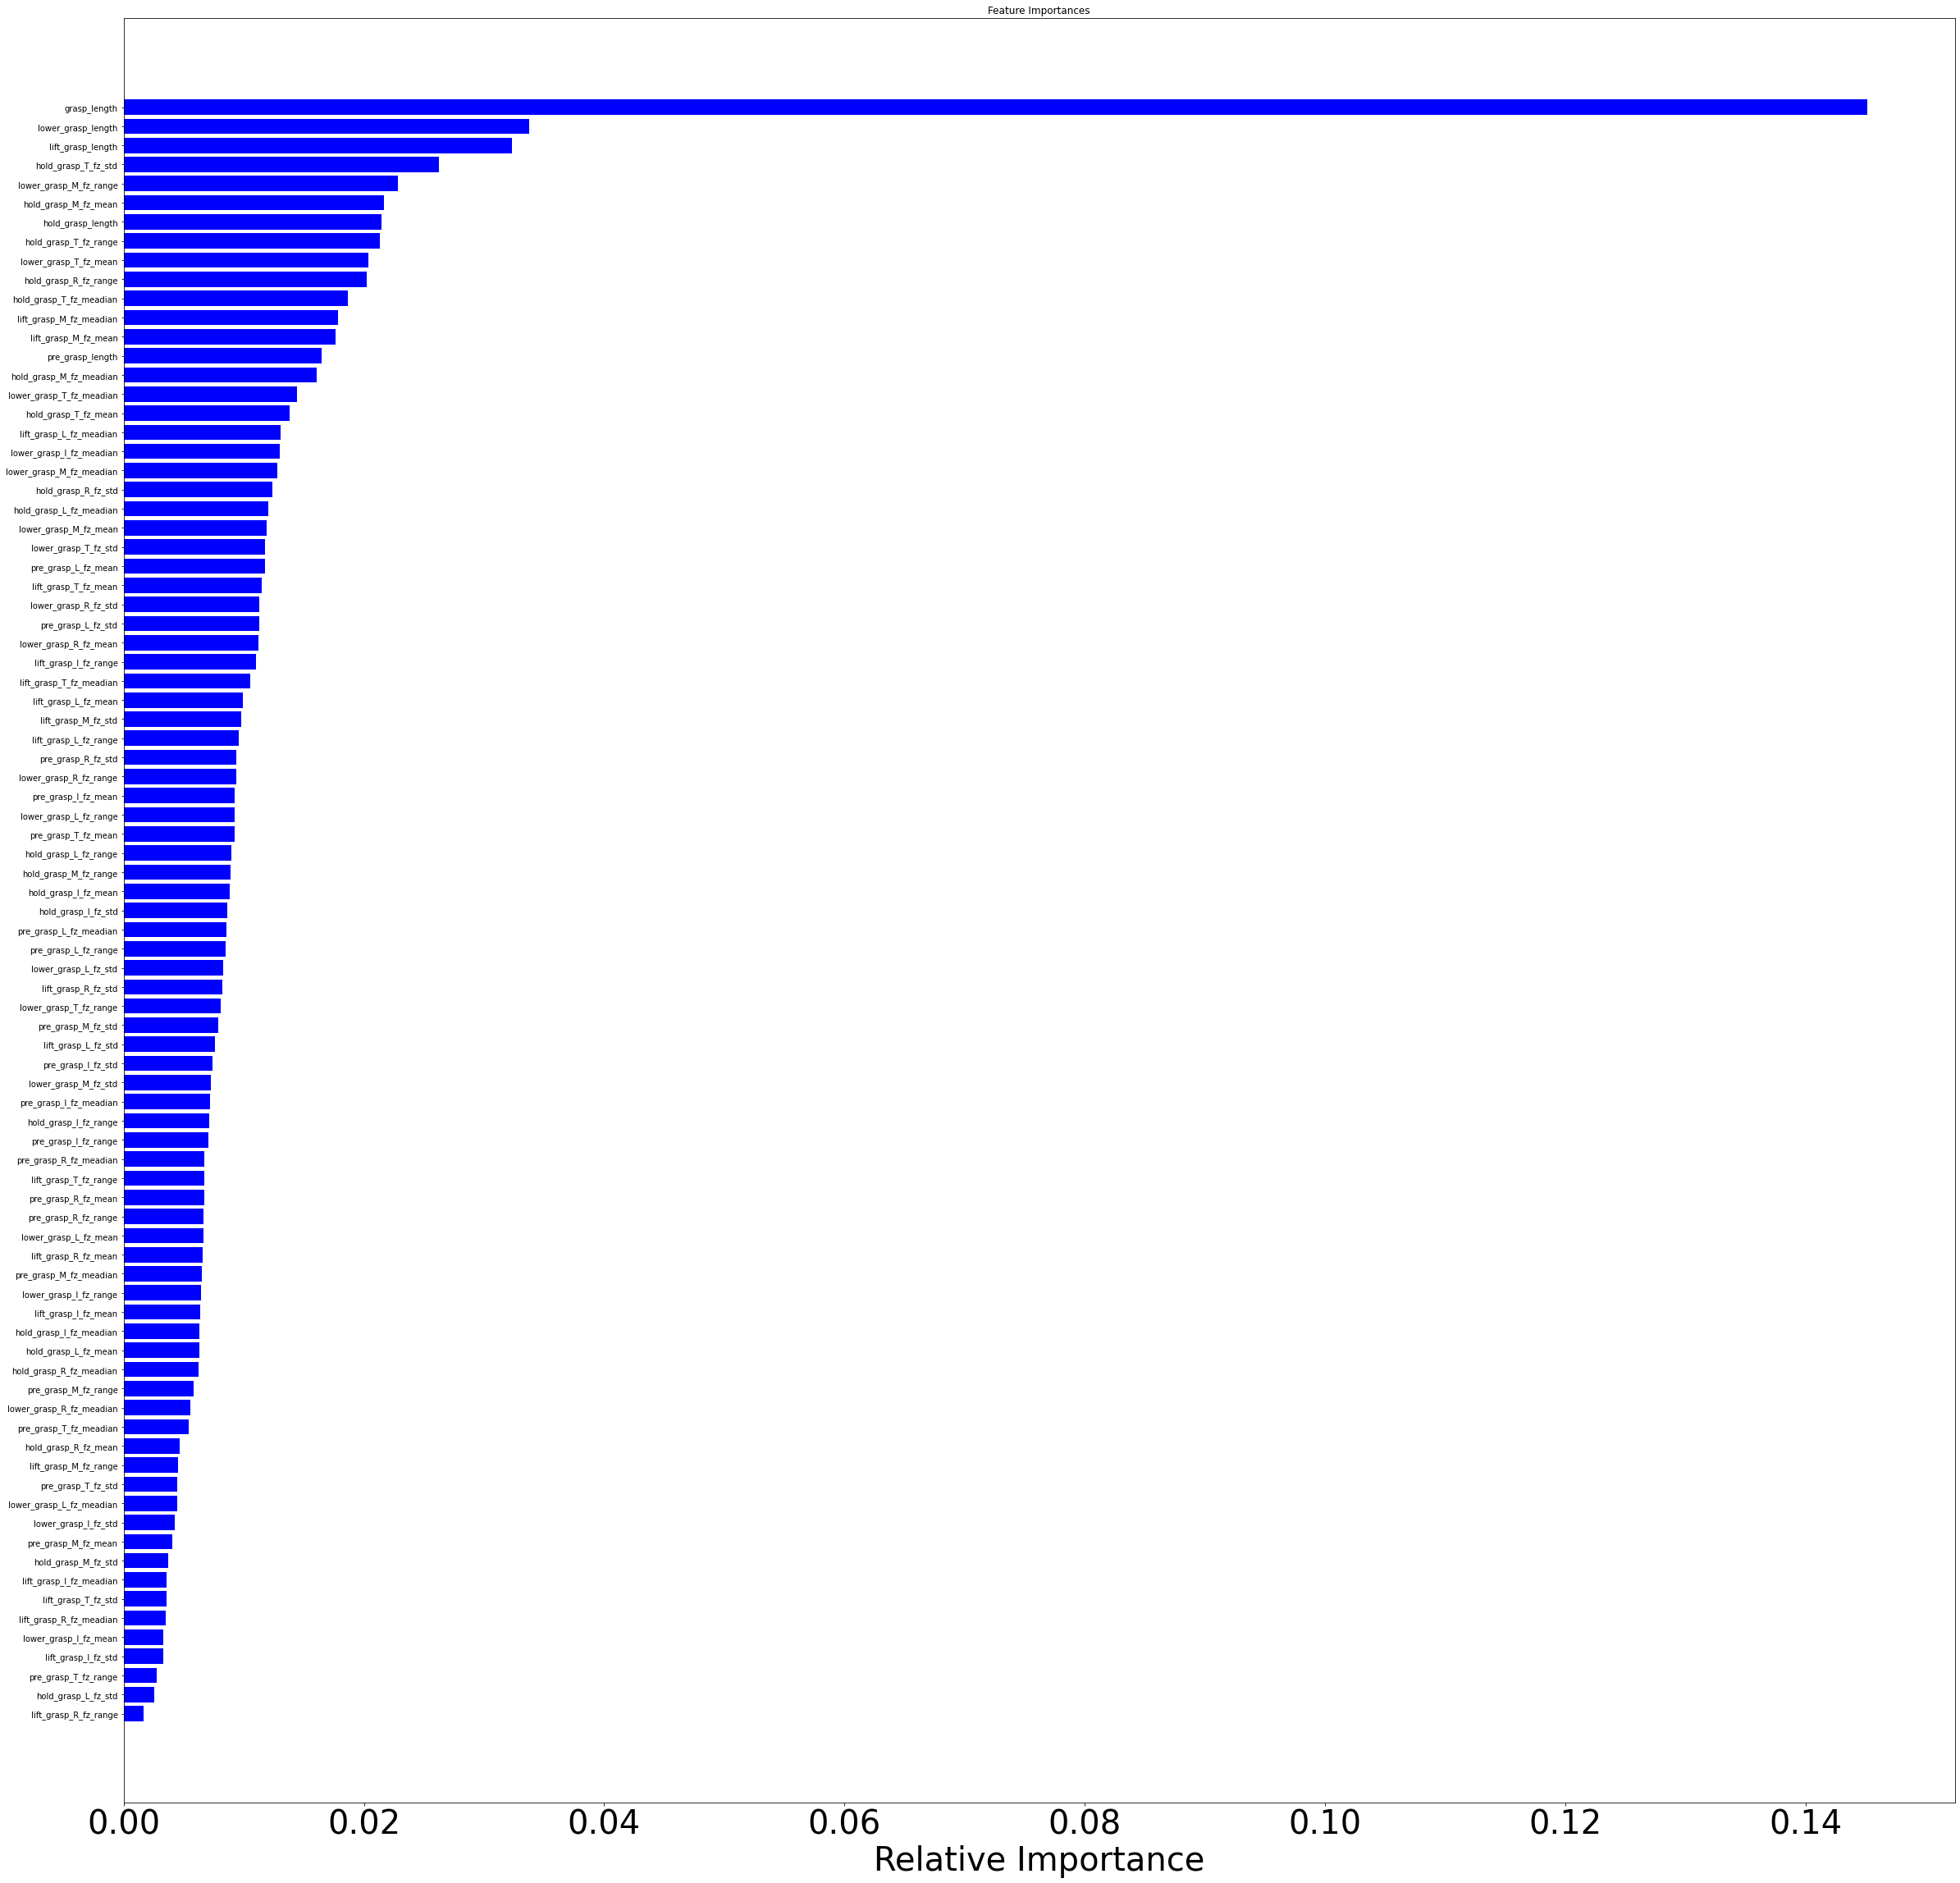

In [ ]:
## Important all 
importances = rf.feature_importances_
# indices = np.argsort(importances)
indices=importances.argsort()
plt.figure(figsize = (40, 40))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [list_grasp[i] for i in indices]),#fontsize=40)
plt.xticks(fontsize=40)
plt.xlabel('Relative Importance',fontsize=40)
# plt.savefig
plt.show()

feats = pd.Series(data = rf.feature_importances_ , index = list_grasp)
feats = feats.sort_values(ascending = False)

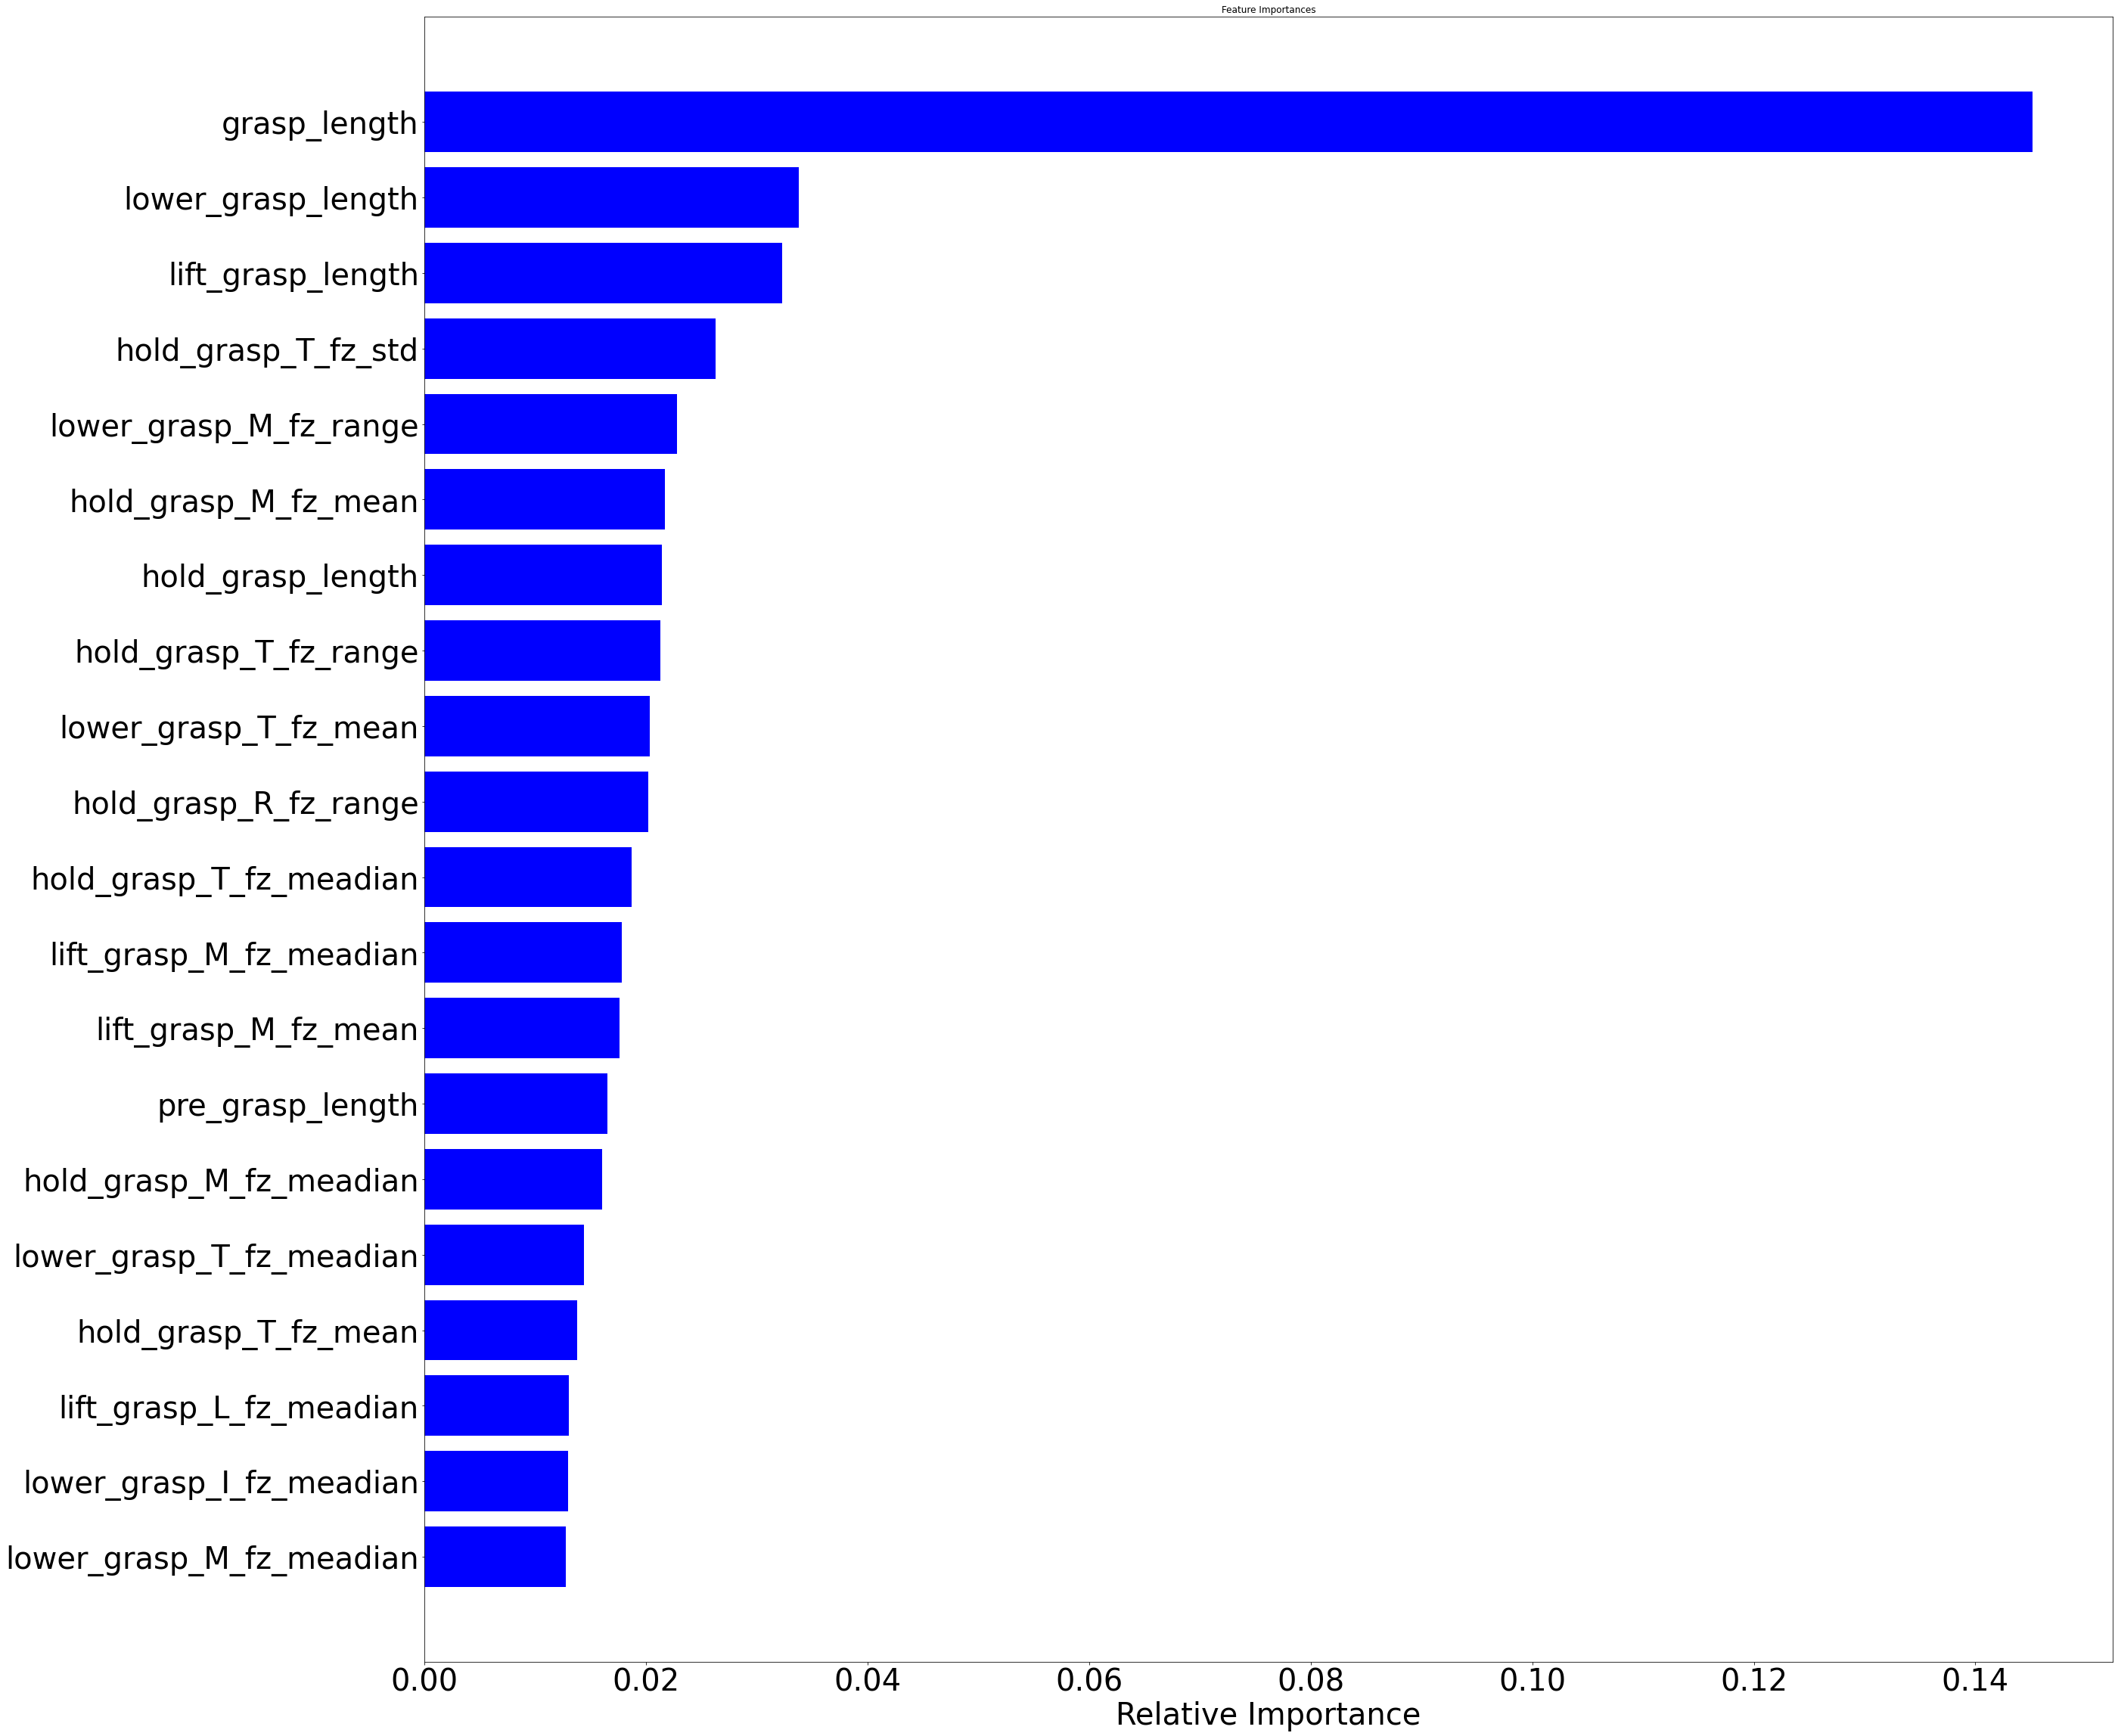

In [ ]:
## Important first 20
importances = rf.feature_importances_
# indices = np.argsort(importances)
indices = importances.argsort()[-20:][::1]
plt.figure(figsize = (40, 40))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color = 'b', align = 'center')
plt.yticks(range(len(indices)), [list_grasp[i] for i in indices],fontsize=40)
plt.xticks(fontsize=40)
plt.xlabel('Relative Importance',fontsize=40)
# plt.savefig
plt.show()

feats = pd.Series(data = rf.feature_importances_ , index = list_grasp)
feats = feats.sort_values(ascending = False)
feats = pd.DataFrame(feats)
feats = feats.T
feats.to_csv(r'/home/motionlab/Desktop/Billy/Build model/Importance.csv', index = False)

## TEST SET

Test set accuracy  72.3404255319149


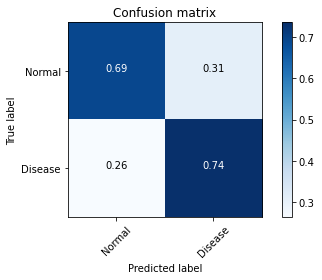

In [ ]:
HC_test = load_data_intra_grasp('HC_test')  # <================ Change here
HC_test = HC_test.values
T_test = load_data_intra_grasp('T_test')   # <================ Change here
T_test = T_test.values
x_test = np.concatenate((HC_test,T_test))
HC_test_label = np.zeros(len(HC_test))
T_test_label = np.ones(len(T_test))
y_test = np.concatenate((HC_test_label,T_test_label))
pred = rf.predict(x_test)
scores = accuracy_score(y_test,pred)*100
print('Test set accuracy ',scores)
conf_mat = np.expand_dims(confusion_matrix(y_test, pred), axis = 2)
conf_mat = np.sum(conf_mat,axis=2)
plot_confusion_matrix(conf_mat, classes = ['Normal','Disease'], 
                      cmap = plt.cm.Blues, normalize = True)